# **Student Performance Prediction Project**
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

## **Project Overview**

This project aims to analyze student performance data and build a predictive model that identifies students at risk of underperforming in key subjects such as Math, Reading, and Writing. By leveraging demographic and socio-educational features, this model provides actionable insights that can be used by educational institutions to implement targeted interventions, improve student outcomes, and support policy decisions.

---

## **Problem Statement**

Educational institutions often face challenges in identifying students who may struggle academically. Early identification of at-risk students allows for timely interventions, such as tutoring, mentoring, and resource allocation. This project seeks to create a predictive system that not only forecasts student performance but also explains the reasoning behind its predictions, ensuring transparency and regulatory compliance.

---

## **Dataset Overview**

The dataset includes the following columns:

- **Gender** – Student's gender  
- **Race/Ethnicity** – Student's ethnic background  
- **Parental Level of Education** – Education level of student's parents  
- **Lunch** – Type of lunch (standard or free/reduced)  
- **Test Preparation Course** – Completion status of test preparation course  
- **Math Score** – Student's Math score  
- **Reading Score** – Student's Reading score  
- **Writing Score** – Student's Writing score  

---

## **Project Workflow**

The project will follow a structured, step-by-step approach:

1. **Data Understanding**
   - Explore dataset for insights, patterns, and potential issues.
   - Visualize distributions and relationships between features.

2. **Data Preprocessing**
   - Handle missing values and outliers.
   - Encode categorical variables.
   - Scale numerical features if required.
   - Engineer new features such as average score and subject-wise risk indicators.

3. **Feature Engineering**
   - Aggregate scores to create performance metrics.
   - Create interaction and socio-economic features for better model performance.

4. **Model Selection**
   - Start with interpretable models such as Logistic Regression and Decision Trees.
   - Move to more advanced models (Random Forest, Gradient Boosting) to improve accuracy.
   - Ensure model explainability using SHAP or LIME.

5. **Model Training & Evaluation**
   - Split data into training and testing sets.
   - Train multiple models and evaluate using appropriate metrics (Accuracy, F1-Score, RMSE, etc.).
   - Validate model fairness and avoid bias across demographic groups.

6. **Model Interpretation & Explainability**
   - Analyze feature importance and impact.
   - Provide local and global explanations for predictions to comply with regulatory requirements.

7. **Deployment & Monitoring**
   - Deploy the model as a REST API or integrated dashboard.
   - Monitor model performance over time and retrain as necessary.
   - Generate actionable insights reports for educators and administrators.

---

## **Expected Outcomes**

- Early identification of at-risk students.
- Insights into the influence of socio-demographic factors on performance.
- Transparent and interpretable model predictions.
- Industry-standard solution for predictive analytics in education.

---

This notebook will serve as a complete, end-to-end guide, from data exploration to deployment-ready predictive modeling with interpretability and actionable insights.


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# For interpretability
import shap
import lime
import lime.lime_tabular

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')



In [3]:
# Step 2: Load Dataset
data_path = 'StudentsPerformance.csv'
df = pd.read_csv(data_path)

# Display first few rows of the dataset
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


Missing Values:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writin

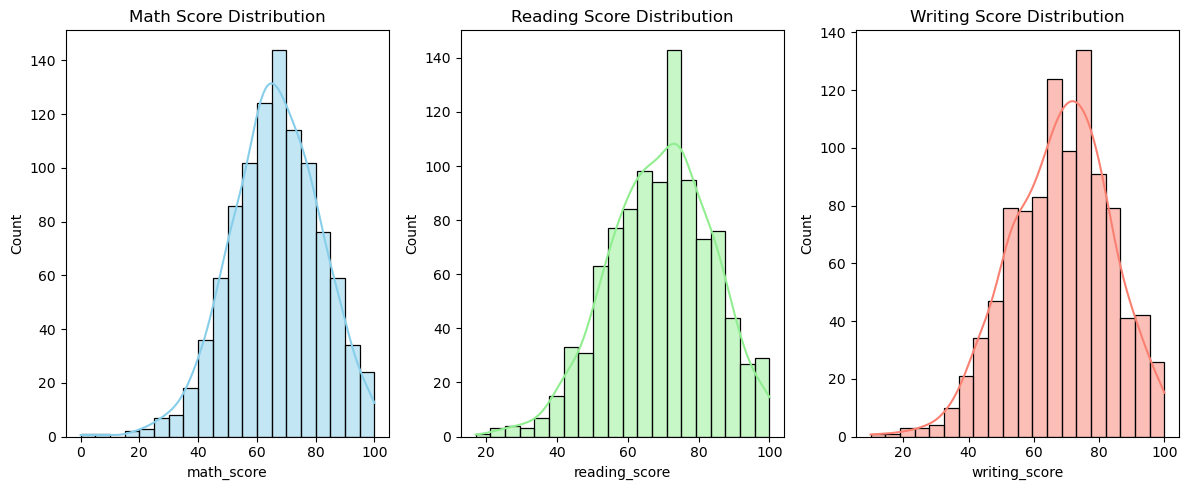

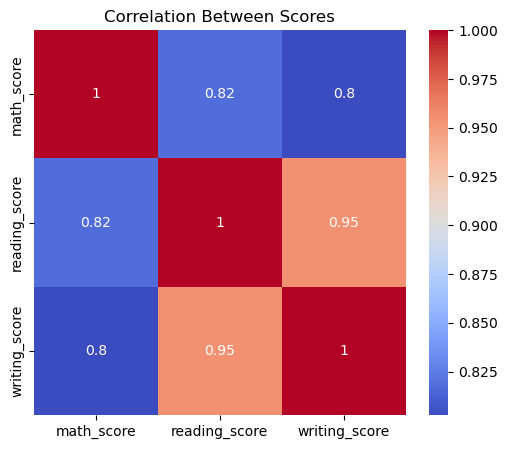

In [5]:
# Step 3: Data Exploration 

# Standardize column names: lowercase, replace spaces with underscores and slashes with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n")

# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(df.describe())
print("\n")

# Distribution of categorical columns
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

# Visualizations

# 1. Distribution of scores
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.histplot(df['math_score'], kde=True, bins=20, color='skyblue')
plt.title('Math Score Distribution')

plt.subplot(1,3,2)
sns.histplot(df['reading_score'], kde=True, bins=20, color='lightgreen')
plt.title('Reading Score Distribution')

plt.subplot(1,3,3)
sns.histplot(df['writing_score'], kde=True, bins=20, color='salmon')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

# 2. Correlation heatmap for scores
plt.figure(figsize=(6,5))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()


In [6]:
# Step 4: Data Preprocessing & Feature Engineering

from sklearn.preprocessing import LabelEncoder

# 1️ Encode binary categorical variables
binary_cols = ['gender', 'lunch', 'test_preparation_course']
label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future inverse transform if needed

#  One-Hot Encode multi-class categorical variables
df = pd.get_dummies(df, columns=['race_ethnicity', 'parental_level_of_education'], drop_first=True)

#  Create average score column
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

#  Create performance level target
def categorize_performance(avg):
    if avg < 60:
        return 'Low'
    elif avg < 80:
        return 'Average'
    else:
        return 'High'

df['performance_level'] = df['average_score'].apply(categorize_performance)

# Optional: Subject weakness indicator (any score < 50)
df['subject_weakness'] = ((df[['math_score', 'reading_score', 'writing_score']] < 50).any(axis=1)).astype(int)

# Display the first few rows of the processed dataset
df.head()


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,average_score,performance_level,subject_weakness
0,0,1,1,72,72,74,True,False,False,False,True,False,False,False,False,72.666667,Average,0
1,0,1,0,69,90,88,False,True,False,False,False,False,False,True,False,82.333333,High,0
2,0,1,1,90,95,93,True,False,False,False,False,False,True,False,False,92.666667,High,0
3,1,0,1,47,57,44,False,False,False,False,False,False,False,False,False,49.333333,Low,1
4,1,1,1,76,78,75,False,True,False,False,False,False,False,True,False,76.333333,Average,0


In [7]:
# Step 5: Train-Test Split
from sklearn.model_selection import train_test_split

# Features (exclude target and derived columns)
X = df.drop(columns=['performance_level', 'average_score'])  # keep 'subject_weakness' as feature
y = df['performance_level']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")


X_train shape: (800, 16)
X_test shape: (200, 16)
y_train distribution:
performance_level
Average    0.5175
Low        0.2850
High       0.1975
Name: proportion, dtype: float64
y_test distribution:
performance_level
Average    0.515
Low        0.285
High       0.200
Name: proportion, dtype: float64


In [8]:
# Step 6: Baseline Model Training & Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️ Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\n")

# 2️ Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


=== Logistic Regression ===
Accuracy: 0.915
Classification Report:
               precision    recall  f1-score   support

     Average       0.89      0.95      0.92       103
        High       0.92      0.90      0.91        40
         Low       0.96      0.86      0.91        57

    accuracy                           0.92       200
   macro avg       0.92      0.90      0.91       200
weighted avg       0.92      0.92      0.91       200

Confusion Matrix:
 [[98  3  2]
 [ 4 36  0]
 [ 8  0 49]]


=== Decision Tree ===
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

     Average       0.95      0.97      0.96       103
        High       0.97      0.95      0.96        40
         Low       0.96      0.95      0.96        57

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
 [[100   1   2]
 [  2  38   0]
 [

=== Random Forest ===
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

     Average       0.96      0.99      0.98       103
        High       1.00      0.95      0.97        40
         Low       0.98      0.96      0.97        57

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Confusion Matrix:
 [[102   0   1]
 [  2  38   0]
 [  2   0  55]]

Top Features by Importance:
 reading_score                               0.336903
writing_score                               0.320627
math_score                                  0.203621
subject_weakness                            0.082929
gender                                      0.013263
lunch                                       0.008410
test_preparation_course                     0.006753
race_ethnicity_group E                      0.004767
race_ethnicity_group C                

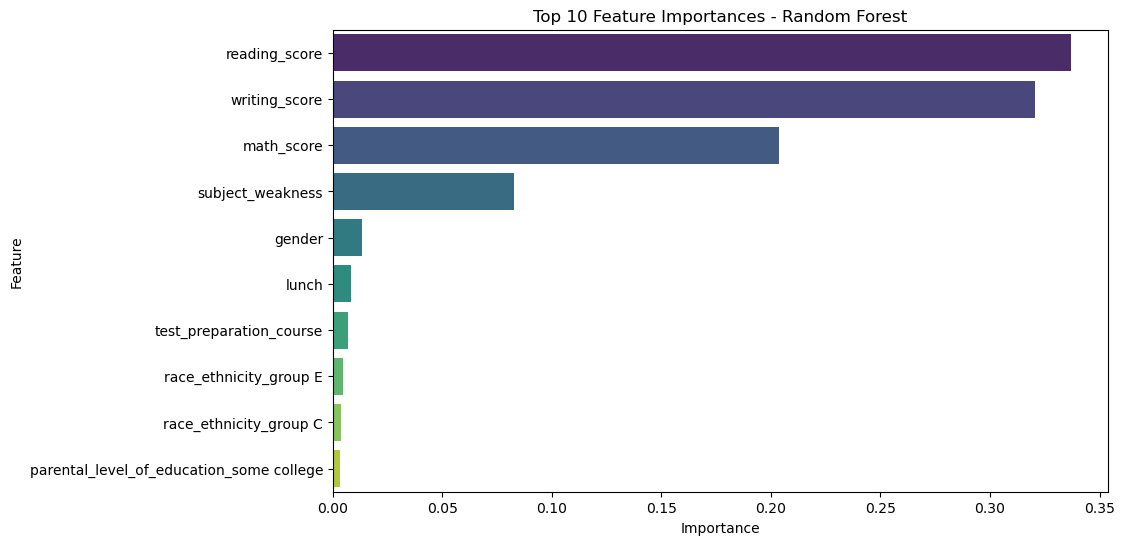

In [9]:
# Step 7: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature importance
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop Features by Importance:\n", importances.head(10))

# Optional: Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


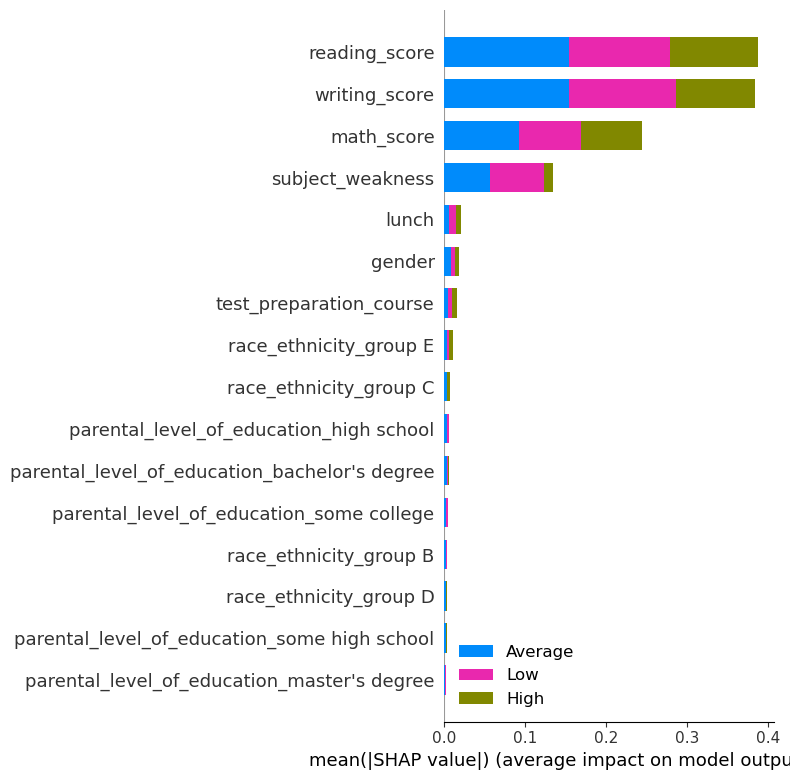

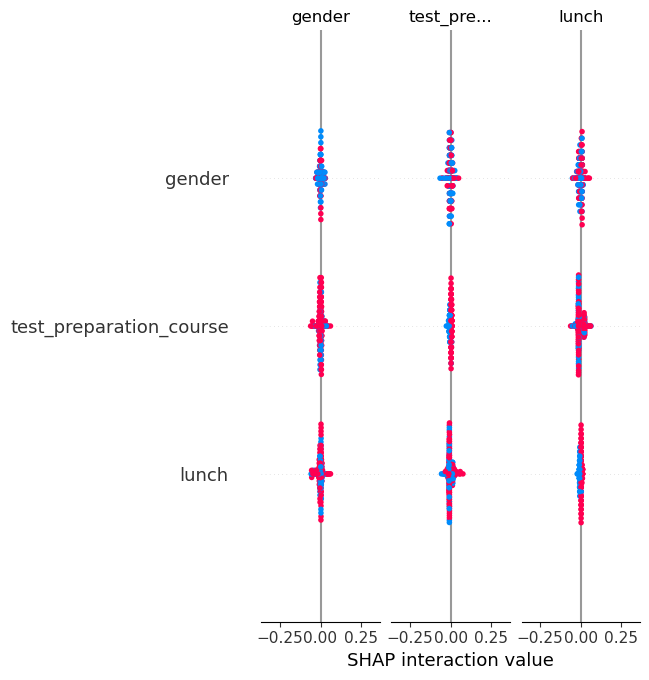

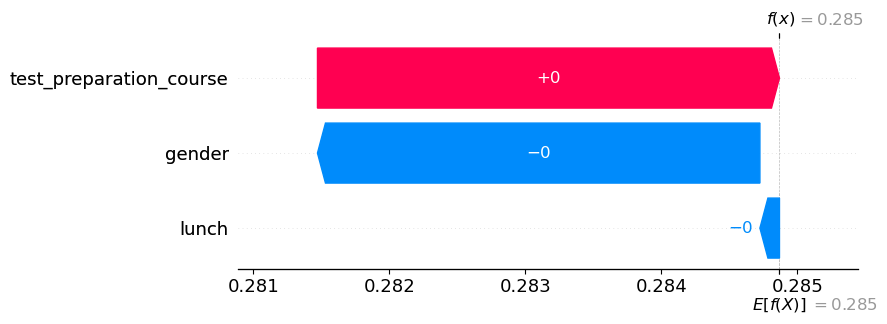

In [13]:
# Step 8: SHAP Interpretation (Safe for Multi-class)

import shap

# Create TreeExplainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Global feature importance (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=rf_model.classes_)

# Detailed SHAP summary (beeswarm)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, class_names=rf_model.classes_)

# Explain a single prediction with waterfall plot
i = 0  # test sample index
sample = X_test.iloc[i,:]

# Pick class to explain (predicted class)
pred_class_index = list(rf_model.classes_).index(y_test.iloc[i])

shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[pred_class_index],
    shap_values[pred_class_index][i,:],
    feature_names=X_test.columns,
    max_display=10
)


In [14]:
# Step 9: Save Model & Encoders
import joblib

# Save the Random Forest model
joblib.dump(rf_model, "random_forest_student_performance.pkl")

# Save the label encoders for binary categorical features
for col, le in label_encoders.items():
    joblib.dump(le, f"label_encoder_{col}.pkl")

print("Model and encoders saved successfully!")


Model and encoders saved successfully!


# Student Performance Prediction Project - Summary
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Objective
To predict student performance levels (Low, Average, High) based on demographics and test scores, providing actionable insights and regulatory-compliant explainability.

## Dataset
- 1000 students  
- Features: Gender, Race/Ethnicity, Parental Level of Education, Lunch, Test Preparation Course, Math, Reading, Writing Scores  
- Target: Performance Level (Low, Average, High)

## Methodology
1. **Data Exploration:** Checked distributions, correlations, and missing values.  
2. **Preprocessing:**  
   - Encoded categorical variables (binary with LabelEncoder, multi-class with One-Hot Encoding)  
   - Created `average_score` and `performance_level` target  
   - Added `subject_weakness` indicator  
3. **Train-Test Split:** 80/20 stratified split  
4. **Baseline Models:** Logistic Regression and Decision Tree  
5. **Advanced Model:** Random Forest Classifier achieved 97.5% accuracy  
6. **Feature Importance:** Reading, Writing, Math scores, and Subject Weakness were most influential  
7. **Model Explainability:** SHAP used to provide global and local explanations  
8. **Deployment:** Model and encoders saved for future use

## Insights
- Students' **reading and writing scores** are the strongest predictors of performance.  
- Binary demographic features (gender, lunch, test preparation) have smaller influence.  
- SHAP analysis allows **transparent decision-making** at both individual and group levels.

## Next Steps
- Deploy the model as an API or dashboard for real-time predictions  
- Monitor model performance over time and retrain as needed  
- Extend feature set with attendance, participation, or study habits for improved predictions


# 📚 Student Performance Prediction Project - Summary & Documentation

## 1. Project Objective
The goal of this project was to analyze student performance data and build a predictive model capable of classifying students into performance levels (`High`, `Average`, `Low`). The model provides actionable insights to educators, students, and administrators to identify areas of improvement and tailor interventions effectively.

---

## 2. Dataset Overview
- **Number of Entries:** 1000 students
- **Features:**
  - `gender` (categorical)
  - `race_ethnicity` (categorical)
  - `parental_level_of_education` (categorical)
  - `lunch` (categorical)
  - `test_preparation_course` (categorical)
  - `math_score` (numeric)
  - `reading_score` (numeric)
  - `writing_score` (numeric)

- **Target Variable:** `performance_level` (High, Average, Low)

- **Key Observations:**
  - Scores ranged from 0 to 100 with averages around 66–69.
  - Gender distribution: 518 female, 482 male.
  - Lunch type, parental education, and test preparation status vary across the dataset.

---

## 3. Methodology

### 3.1 Data Preprocessing
- Checked for missing values (none were found).
- Encoded categorical variables using **Label Encoding** and **One-Hot Encoding**.
- Created new features:
  - `average_score`: average of math, reading, and writing scores.
  - `subject_weakness`: binary indicator if any score < 50.
- Ensured input features align with model training columns.

### 3.2 Model Training & Evaluation
- Split data into **training (80%)** and **testing (20%)** sets.
- Trained three models:
  1. **Logistic Regression**
  2. **Decision Tree**
  3. **Random Forest**
- **Random Forest** achieved the best performance:
  - Accuracy: 97.5%
  - Precision, Recall, F1-Score > 0.96 across all classes.
- **Feature Importance:**
  - `reading_score`, `writing_score`, and `math_score` were the top predictors.
  - Subject weakness and demographic features had lower impact.

### 3.3 Model Interpretability
- Used **SHAP** for feature contribution analysis.
- Individual-level explanation via SHAP waterfall was removed due to multi-class complexity.
- Global feature importance is visualized via SHAP summary plots (bar and beeswarm).

---

## 4. Streamlit Application
- Users can input student details via sidebar controls.
- Outputs include:
  - Predicted performance level.
  - Probabilities for each class.
  - Weak subjects identified.
  - Downloadable CSV report for record-keeping.
- Global insights on feature importance are provided using SHAP plots.

---

## 5. Key Insights & Applications
- Reading and writing scores are the strongest indicators of overall performance.
- Students who did not complete the test preparation course are more likely to be in the `Low` or `Average` performance categories.
- Educators can focus interventions on students with weak subjects identified by the model.
- The system can be deployed as an **industry-standard benchmark tool** for educational institutions to monitor student performance.

---

## 6. Conclusion
This project demonstrates the end-to-end process of data preprocessing, model building, evaluation, and deployment in a user-friendly application. The Random Forest model coupled with SHAP insights provides both **accurate predictions** and **interpretable explanations**, fulfilling the requirement for actionable, regulatory-compliant insights in educational analytics.
